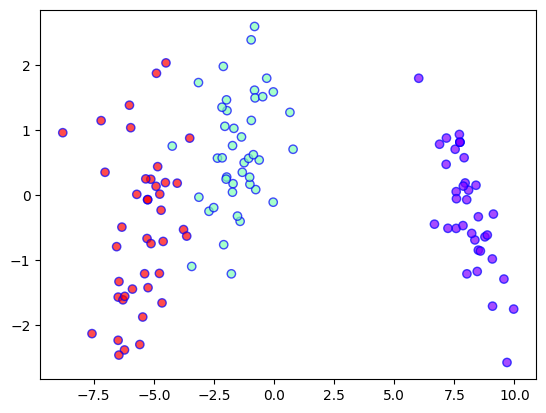

In [1]:
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
#StandardScaler removes the mean and scales each feature/variable to unit variance.
sc = StandardScaler()
#The fit_transform () method will determine the parameters and transform the dataset.
X = sc.fit_transform(X)
#Encode target labels with value between 0 and n_classes-1
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow',
alpha=0.7,edgecolors='b'
)




In [2]:
print(X)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [3]:
print(X_train)

[[-7.57183891e+00 -2.13307849e+00]
 [-4.23326439e+00  7.50555738e-01]
 [-6.32802563e+00 -4.95466955e-01]
 [ 7.73000981e+00  8.10385045e-01]
 [-5.28255746e+00 -6.70743893e-01]
 [ 7.53165951e+00  7.01585030e-01]
 [ 9.56104628e+00 -1.29407926e+00]
 [ 8.09085419e+00  7.30825988e-02]
 [ 8.02175214e+00 -1.21408836e+00]
 [-3.42398429e+00 -1.10004620e+00]
 [ 7.94770284e+00  1.83402592e-01]
 [-1.35343241e+00  8.90651028e-01]
 [-6.01396335e+00  1.37894366e+00]
 [-3.14339589e+00  1.72629580e+00]
 [-6.48187886e+00 -1.57172129e+00]
 [-7.02902068e+00  3.47481038e-01]
 [-8.11598901e-01  1.60955357e+00]
 [-1.32036452e+00  3.47596760e-01]
 [-3.04336749e-02  1.58281944e+00]
 [ 9.08647148e+00 -1.71076491e+00]
 [-5.12586406e+00  2.40430022e-01]
 [-6.48453589e+00 -2.23540658e+00]
 [-1.95617398e+00  1.29552200e+00]
 [-3.52951252e-02 -1.12376951e-01]
 [-3.12594315e+00 -3.54920319e-02]
 [ 9.07846638e+00 -9.84999639e-01]
 [-1.41119683e+00 -4.06537127e-01]
 [-6.44935516e+00 -1.33256689e+00]
 [ 6.60483170e-01  1

In [4]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
Accuracy1.0
